In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Mandeep Dhinwa/Desktop/Dhinwa/Cureya/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# male : 0, female : 1
df["sex"] = df["sex"].map({"male":0, "female":1})

# yes : 0, no : 1
df["smoker"] = df["smoker"].map({"yes":0, "no":1})

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


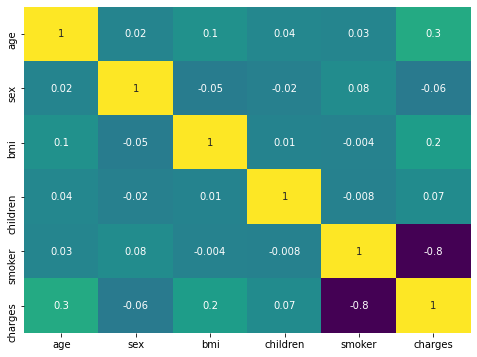

In [10]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

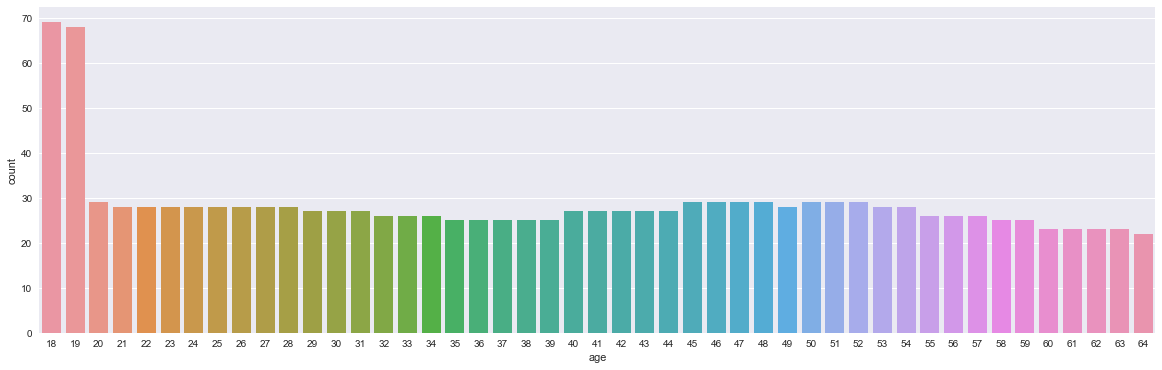

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(df["age"]);

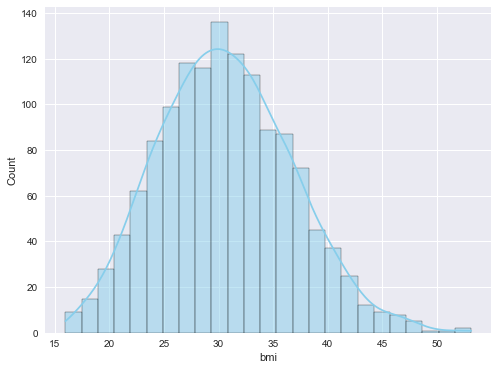

In [34]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x = df["bmi"], color="skyblue", kde=True);

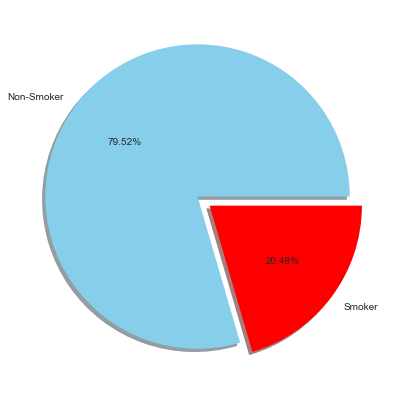

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(x=df["smoker"].value_counts(), 
        colors=["skyblue","red"], 
        labels=["Non-Smoker","Smoker"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

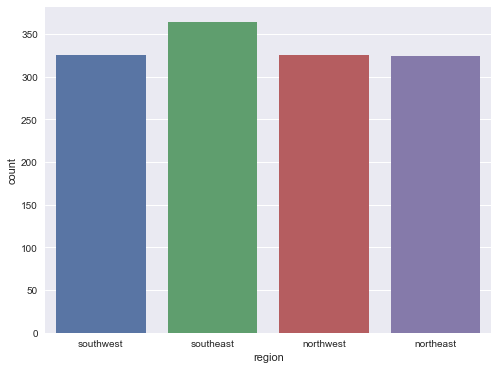

In [16]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df["region"]);

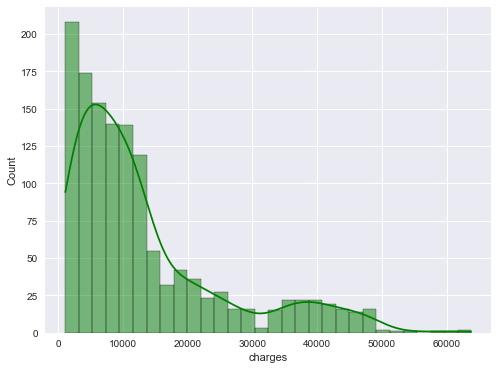

In [38]:

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x = df["charges"], color="green", kde=True);

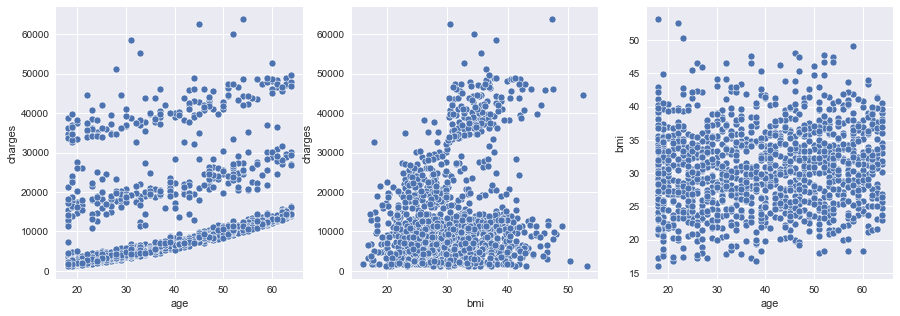

In [41]:
plt.style.use("seaborn")
fig, ax =plt.subplots(1,3, figsize=(15,5)) 

sns.scatterplot(x = df['age'], y = df['charges'], ax=ax[0]);

sns.scatterplot(x = df['bmi'], y = df['charges'], ax=ax[1]);

sns.scatterplot(x = df['age'], y = df['bmi'], ax=ax[2]);

In [42]:
# X data
X = df.drop("charges",axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,0
1,18,0,33.770,1,1
2,28,0,33.000,3,1
3,33,0,22.705,0,1
4,32,0,28.880,0,1


In [43]:
# y data
y = df["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
len(X_train), len(X_test)

(1070, 268)

In [24]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 78.11302113434095


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
RandomForestRegressorScore = rf.score(X_test, y_test)
print("Accuracy obtained by Random Forest Regressor model:",RandomForestRegressorScore*100)

Accuracy obtained by Random Forest Regressor model: 85.58624888150334


In [29]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
DecisionTreeRegressorScore = tree.score(X_test, y_test)
print("Accuracy obtained by Decision Tree Regressor model:",DecisionTreeRegressorScore*100)

Accuracy obtained by Decision Tree Regressor model: 70.4046304125731


In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [32]:
KNeighborsRegressorScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Regressor model:",KNeighborsRegressorScore*100)

Accuracy obtained by K Neighbors Regressor model: 83.76909504566598


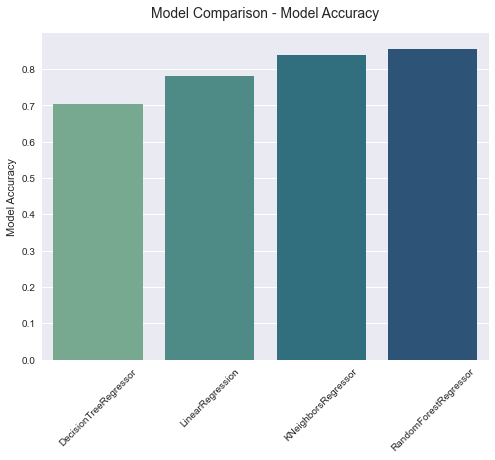

In [37]:
plt.style.use("seaborn")

x = ["DecisionTreeRegressor",
     "LinearRegression",
     "KNeighborsRegressor", 
     "RandomForestRegressor"]

y = [DecisionTreeRegressorScore,
     LinearRegressionScore, 
     KNeighborsRegressorScore, 
     RandomForestRegressorScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=45)
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03);